# Dijkstra's Single Source Shortest Path Algorithm


Have you ever wondered the algorithm that powers finding the shortest route between two locations on Google Maps?
(or) How network packets are efficiently routed from the source node to the target node in a network?

The answers to the above questions can be found in the Single Source Shortest Path Algorithm, more commonly referred as the **Dijkstra's Algorithm**. In this notebook, we aim to introduce the idea of implementing the Dijkstra's algorithm on a *undirected, weighted graph*. If the terms *undirected graphs* and *weighted graphs* are new to you, please check out the previous notebook [`0_graphs and graph representations`](#). This notebook is organized as follows:

--table of contents comes here(with links to sections)--


# Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Dijkstra's shortest path algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph_from_adjMatrix import *
from modules.visualize_graph import *

## Building the graph

The notion or idea of a graph is a set of nodes that are connected by edges. 

Nodes are objects or points that represent a networking device or component like edge nodes, router, data centres, name servers. Edges represents the connection between two nodes, and often time communicates two information namely the weight and direction.
1. **Weights** is a scalar quantity that typically represents either the distance between two nodes, or the latency between two nodes on the network.
2. **Direction** is a quantity which represents the direction in which communication happens between two nodes.

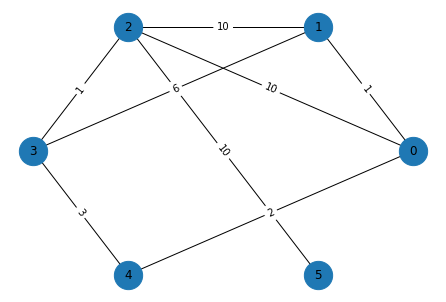

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.create_from_nodeList([a, b, c, d, e, f])


graphs.connect(a,b,1)
graphs.connect(a,c,10)
graphs.connect(a,e,2)
graphs.connect(b,c,10)
graphs.connect(b,d,6)
graphs.connect(c,d,1)
graphs.connect(c,f,10)
graphs.connect(d,e,3)

adjacentMatrix = graphs.get_adjMatrix()
visualGraph = visualizeGraph(adjacentMatrix)

This is a sample graph that will be used by us for the entire notebook. You are free to add (or) change the number of nodes, and edges.

Typically, both nodes and edges can contain information. For example in a typical home network the nodes represent the network components_that can be named like 'home router' (or) 'switch' and the edges represents the distance between the network components. The notable routing algorithms that use the Dijkstra's algorithms are [Intermediate System to Intermediate System (IS-IS)](https://en.wikipedia.org/wiki/IS-IS) and [Open Shortest Path First (OSPF)](https://en.wikipedia.org/wiki/Open_Shortest_Path_First) both of which correspond to the class of routing algorithms called [Link State Routing(LSR)](https://en.wikipedia.org/wiki/Link-state_routing_protocol)

You can also consider graphs to be relevant in other applications like social networks which contain nodes as users and edges could interactions between users, knowledge graphs which powers platforms like Wikipedia which have nodes as wiki articles and edges as their relationship with other pages.

In the above implementation of creating a graph, you can also pass an additional data parameter which allows the nodes in the graphs to hold additional data. 

## Graph Representations

While this is a slight deviation from the actual topic of implementing Dijkstra's Algorithm, it is important to describe the two ways of representing a graph on paper (or) code namely the **Adjacency List** and **Adjacency Matrix**. This section will not be a detailed explanation about these representations but the purpose is to introduce how graph representations can help in implementing graph-based algorithms. In case you are interested in reading more about the graph representations check out [0_graphs and graph_representations](#).


**Adjacency Matrix** in a nutshell is a ($n * n$) square matrix which indicates if two vertices are connected by an edge or not. Adjacency matrices are used since they are intutive and helps to visualize the graphs. However, as the graphs get bigger the runtime of using an adjacency matrix increases, more information can be found on the [running_time section](#).

The following is the adjacency matrix representation for the graph considered as an example. In this matrix, each row and column represents one node. For example row "1" and column "1" will be associated with Node "1" (or `b (in code)`) in the visualized graph above. Each element in this matrix represents an edge, which is either denoted as (0,1) for an unweighted graph or with a value which corresponds to the weight of the edge. In our graph, for Node 1, we have three edges namely:
1. (1,0) -> 1   `in code they correspond to graphs,connect(a,b,1)`
2. (1,2) -> 10  `in code they correspond to graphs,connect(b,c,10)`
3. (1,3) -> 6   `in code they correspond to graphs,connect(b,d,6)`

In our example, since the graph is undirected, we notice that the adjacency matrix as well its trasponse are symmetrcical, which indicates the connections are bidirectional. The bidirectional nature of the edge can be observed in the matrix where the statement `graphs,connect(a,b,1)` has the edge presence for both (0,1) -> 1 and (1,0) -> 1 cases on the adjacency matrix.

In [3]:
graphs.get_adjMatrix()

[[0, 1, 10, 0, 2, 0],
 [1, 0, 10, 6, 0, 0],
 [10, 10, 0, 1, 0, 10],
 [0, 6, 1, 0, 3, 0],
 [2, 0, 0, 3, 0, 0],
 [0, 0, 10, 0, 0, 0]]

**Adjacency List** are compact representations for the graph as each node on the graph is associated with the collection of its neighboring nodes and their corresponding edge weights. In comparison to the adjacency matrix, the main difference of adjacency lists in the amount of space in the memory it occupies. While adjacency matrix representations consume $O(n^2)$, adjacency lists consume $O(m)$ where $m$ refers to the number of edges adjacent to the node. The space saved in the memory also results in a faster lookups when adjacency lists are used. 

In practice, adjacency list representations for a graph can be done in different ways based on the data strucutre used namely with dictionaries, linked lists or hash tables. It is to be noted that adjacency lists are considered efficient implementation choice when the graph is sparsely connected. Below, is the adjacency list representation of the graph we use as example in this notebook

In [4]:
graphs.get_adjacencyList()

defaultdict(dict,
            {0: {1: 1, 2: 10, 4: 2},
             1: {0: 1, 2: 10, 3: 6},
             2: {0: 10, 1: 10, 3: 1, 5: 10},
             3: {1: 6, 2: 1, 4: 3},
             4: {0: 2, 3: 3},
             5: {2: 10}})

### Adjacency List vs Adjacency Matrix: an overview

Now that we have an overview of the two ways to represent a graph, we are interested to understand which is a better method to represent the graph. Adjacency lists appear to be an effective graph representation if we are interested to implement time-efficient algorithms. If we would like to visualize the graph intuitively, the adjacency matrix is the better representation.

**Performance Factors**
1. *Space Complexity* refers to the amount of space the graph representation occupies on the memory
2. *Edge Lookup* refers to the time taken for checking the presence or absence of an edge between two nodes
3. *Add new edge* is the time taken to add a new edge
4. *Add/ Delete Node* the time taken to 

**Notation guide**
`k` refers to the number of neighboring nodes in the adjacency list 
`m` refers to the number of edges in the graph
`n` refers to the number of nodes in the graph

|  Factor | Adjacency Matrix | Adjacency List | Winner|
|----------------------|------------------|----------------|---------------|
| Space Complexity     |     $O(n^2)$     |      $O(m)$    |For sparse graphs; adjacency lists|
| Edge Lookup          |     $O(1)$       |      $O(k)$    |Adjacency Matrix, Adjacency lists are slightly slower|
| Adding new Edge      |     $O(1)$       |      $O(1)$    |Tie|
| Adding/Removing nodes|     $O(n^2)$     |      $O(k)$    |Adjacency lists; iterating over one dimension is faster|

We believe this table, should help you make an informed decision on which graph representation would be suitable for your algorithm.

# Implementing Dijkstra shortest path algorithm

**Important Notes**
1. The algorithm cannot have negative edge weights. 
   **Reason:** Negative weights will adversely affect the distance comparison step, meaning the greedy approach of always finding the shortest path will not be met.
2. Dijkstra's algorithm is commonly implemented to find all the shortest paths from the source Node. In this notebook, you are shown both the implementation of finding all the shortest paths from the source and the shortest path between a given source and target node. The paths found by the Sijkstra's algorithm are the absolute shortest path, which we explain in the [Proof of Correctness](#) section.
3. We will also be demonstrating the implementation of the Dijkstra's algorithm using the adjacency list as well as the adjacency matrix representations of a graph. We also add the optimized implementaiton of the Dijkstra's algorithm which makes it asymptotically faster.

### About the algorithm
The idea behind Dijkstra's algorithm is to find the shortest path from a source Node to all the nodes (or) a specific target node on the graph without checking every source-to-destination combination. The drawback of considering every source-to-destination combination means that the computation of shortest path in large graphs becomes time consuming and cumbersome to check if we have the shortest path. Thus, the Dijkstra's algorithm proposed a greedy approach where the shortest path to the target is taken by considering the minimum distance to be travelled at a given time. 

### Algorithm steps

**Setup()**
1. Set distance to all node nodes from the `source` as `infinity`
2. Define an empty list of `seen_nodes`. This helps us to prevent compute the shortest path for nodes where the shortest path is already computed. The nodes that are added ot the `seen_nodes` are the ones for which have the absolute shortest path. In order, to ensure a shorter look-up time for shortest path we use `set()` datastructure which optimizes the look-up time at O(1) instead of O(n) when a `list()` data structure is used.
3. Set the distance from the source node to itself as 0, and the array representing the hops taken to reach the shortest path to contain the source node itself. This means that we can back-track the hops taken to reach the shortest path from the source node.

**Loop()**
4. **While** there exists a node in the queue that is not `seen`:
5. Set the current node as the node with the smallest distance (in code, referred as `min_node` and `min_dist`). In the first iteration of the loop, this will be the source node and thus we set the `dist` as 0.
6. Add the current node, `min_node` to the `seen` set
7. Update the total distance (`tot_dist`) for each neighbors of the current node, `min_node` to be the absolute distance from `min_node` to `source` added with the edge length from the `min_node` to its neighbor, **IF** this value is less than the current distance computed for `min_node`'s neighbor. 
    If this neighbor is not seen, then since `tot_dist` is initiated to infinity, the computed sum of `tot_dist` should be less than this sum. If we update the `tot_dist`, we also update the hops (previous nodes) that were used to reach this distance by concatenating the hops of `min_node` along with `min_node` to the `source` node.
8. **End While**

### Pseudocode of the above steps

<pre>1  <b>function</b> Dijkstra(<i>Graph</i>, <i>source</i>):
2      dist[<i>source</i>] ← 0   <i>// Initialization</i>
3
4      create vertex priority queue Q
5
6      <b>for each</b> vertex <i>v</i> in <i>Graph</i>:           
7          <b>if</b> <i>v</i> ≠ <i>source</i>
8              dist[<i>v</i>] ← INFINITY  <i>// Unknown distance from source to v</i>
9          seen[<i>v</i>] ← UNDEFINED  <i>// Predecessor of v</i>
10
11         <i>Q</i>.add_with_priority(<i>v</i>, dist[<i>v</i>])
12
13
14     <b>while</b> <i>Q</i> is not empty:  <i>// The main loop</i>
15         <i>u</i> ← <i>Q</i>.extract_min()<i>// Remove and return best vertex</i>
16         <b>for each</b> neighbor <i>v</i> of <i>u</i>:<i>// only v that remain in Q</i>
17             <i>tot_dist</i> ← dist[<i>u</i>] + length(<i>u</i>, <i>v</i>) 
18             <b>if</b> <i>tot_dist</i> &lt; dist[<i>v</i>]
19                 dist[<i>v</i>] ← <i>tot_dist</i>
20                 seen[<i>v</i>] ← <i>u</i>
21                 <i>Q</i>.decrease_priority(<i>v</i>, <i>alt</i>)
22
23     <b>return</b> dist, seen
</pre>

In [5]:
def dijkstra(graph, sourceNode):
    sourceNodeIndex = graph.get_nodeIndex(sourceNode)
    nodeList = graph.get_nodeList()

    # Make an array keeping track of distance from node to any node
    # in self.nodes. Initialize to infinity for all nodes but the 
    # starting node, keep track of "path" which relates to distance.
    # Index 0 = distance, index 1 = node hops
    dist = [None] * len(nodeList)
    for i in range(len(dist)):
        dist[i] = [float("inf")]
        dist[i].append([nodeList[sourceNodeIndex]])
    
    dist[sourceNodeIndex][0] = 0
 
    # Queue of all nodes in the graph
    # Note the integers in the queue correspond to indices of node
    # locations in the self.nodes array
    queue = [i for i in range(len(nodeList))]
    # Set of numbers seen so far
    seen = set()
    while len(queue) > 0:
        # Get node in queue that has not yet been seen
        # that has smallest distance to starting node
        min_dist = float("inf")
        min_node = None
        for n in queue: 
            if dist[n][0] < min_dist and n not in seen:
                min_dist = dist[n][0]
                min_node = n
        
        # Add min distance node to seen, remove from queue
        queue.remove(min_node)
        seen.add(min_node)
        
        
        # Get all next hops -> all shortest paths
        connections = graph.connectionsFrom(min_node)
        # For each connection, update its path and total distance from 
        # starting node if the total distance is less than the current distance
        # in dist array
        print("current node %s" % min_node)
        for (node, weight) in connections: 
            tot_dist = weight + min_dist
            if tot_dist < dist[node.index][0]:
                dist[node.index][0] = tot_dist
                dist[node.index][1] = list(dist[min_node][1])
                dist[node.index][1].append(node)
                #<!--growith of the algorithms plots comes here--->                
            print("Distance from Node %s to Node %s is of weight %d at a distance of %d from sourceNode %s" % (min_node, node.index, weight, tot_dist, sourceNode.index)) 
        print("-------------------------------------------------")
    
    return dist

## Computing the shortest path

Now, that we have an understanding of how DIjkstra's algorithm computes the shortest path, we find the shortest path between a given source node and the target node. In short, we visualize only the shortest path between the source and the target nodes instead of visualizing the shortest paths to all the nodes. 

current node 0
Distance from Node 0 to Node 1 is of weight 1 at a distance of 1 from sourceNode 0
Distance from Node 0 to Node 2 is of weight 10 at a distance of 10 from sourceNode 0
Distance from Node 0 to Node 4 is of weight 2 at a distance of 2 from sourceNode 0
-------------------------------------------------
current node 1
Distance from Node 1 to Node 0 is of weight 1 at a distance of 2 from sourceNode 0
Distance from Node 1 to Node 2 is of weight 10 at a distance of 11 from sourceNode 0
Distance from Node 1 to Node 3 is of weight 6 at a distance of 7 from sourceNode 0
-------------------------------------------------
current node 4
Distance from Node 4 to Node 0 is of weight 2 at a distance of 4 from sourceNode 0
Distance from Node 4 to Node 3 is of weight 3 at a distance of 5 from sourceNode 0
-------------------------------------------------
current node 3
Distance from Node 3 to Node 1 is of weight 6 at a distance of 11 from sourceNode 0
Distance from Node 3 to Node 2 is of w

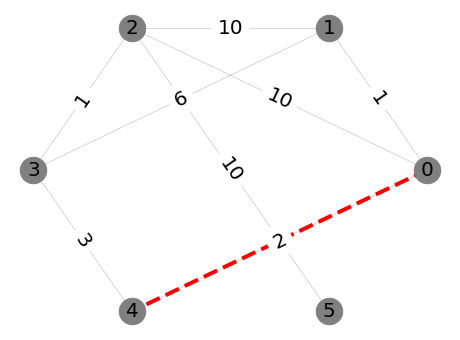

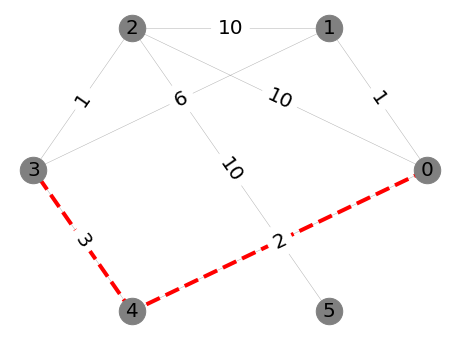

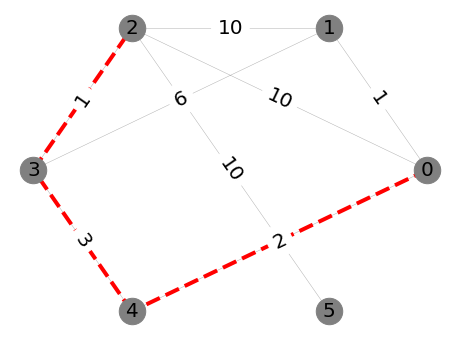

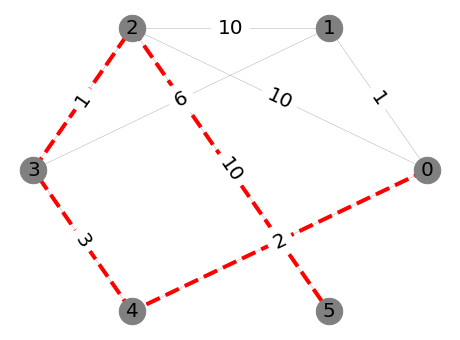

In [6]:
def printShortestPath(graphs, sourceNode, targetNode):
    sourceNodeIndex = graphs.get_nodeIndex(sourceNode)
    targetNodeIndex = graphs.get_nodeIndex(targetNode)
    
    for (weight, node) in dijkstra(graphs,a):
        if targetNodeIndex == [n.index for n in node][-1]:
            nodes_in_path = [n.index for n in node]
            edgelist = []
            for i in range(len(nodes_in_path)):
                try:
                    wt = graphs.getWeight(nodes_in_path[i],nodes_in_path[i+1])
                    edgelist.append((nodes_in_path[i],nodes_in_path[i+1], wt))
                    displayPath(visualGraph, edgelist) #plots the shortest path from source to target
                except IndexError:
                    break
    return nodes_in_path, edgelist           
    
    
nodes, edges = printShortestPath(graphs, a, f) 

In [7]:
# animation = show how the decision making in the algorithm evolves
# from matplotlib import animation, rc
# from IPython.display import HTML
# fig, ax = plt.subplots()
# anim = animation.FuncAnimation(fig, animateGraph, frames=len(edges), fargs=(visualGraph,edges,),
#                                interval=20, 
#                                blit=True)

# HTML(anim.to_html5_video())

## Optimizing using adjacency list representation and priority queues

Now that we have clear distinction that adjacency list representation offers a better algorithmic performance over adjacency matrix. We would like to see if we could optimize the algorithmic performance of our implementation of the Dijkstra's Shortest Path algorithm.

### Why optimize?
Dijkstra's shortest path is already a greedy algorithm which saves computation and time, since in every iteration of the algorithm, we find the node with smallest distance before making our next greedy decision. This decision-making step ensures that not every possible source-destination combination is checked in order to determine the shortest path.

In our implementation of the Dijkstra's algorithm, so far, we search through a list, `queue` based on the values of `dist`. The maximum length of `queue` is the number of nodes$(n)$ in the graph, therefore iterating along the `queue` takes $O(n)$ time. Since, we terminate only when all the nodes are visited, that is the length of `seen` set is the number of nodes in the graph, we are doing the $O(n)$ operation of iterating through the nodes n-times, making the total running time of our implementation to become $O(n^2)$. Now, if we look at our graph representation, we use an adjacency matrix, which means to find the connections (or) the edges for a particular node, we iterate through the entire matrix row which has the length equal to the number of nodes in the graph. This adds another $O(n)$ time while iteration while looping through each node in the graph.


### Optimization Steps
1. Instead of iterating through the entire row of the adjacency matrix representation of the graph to find the nodes adjacent to the current node at $O(n)$ time, we use the adjacency list representation which could reduce the time to find adjacent nodes to $O(k)$ where `k` refers to the number of edges for the node.
2. Instead of maintaining a list of nodes and iterating over them at $O(n)$ time, we use a Binary heap which helps to find the node with the minimum distance at $O(log(n))$ or use a Fibonacci heap which will make the task to find the nodes with minimum distance at $O(1)$ time.


### What are Heaps?



### How Heaps improve running time? 

### Implementation notes

In [8]:
# def shortest(v, path):
#     ''' make shortest path from v.previous'''
#     if v.previousthe Dijkstra's algorithm with
# def dijkstra_anotherWay(aGraph, start, target):
#     print('''Using the Dijkstra's shortest path algorithm .........''')
#     # Set the distance for the start node to zero 
#     start.set_distance(0)
#     # Put tuple pair into the priority queue
#     unvisited_queue = [(v.get_distance(),v) for v in aGraph]
#     heapq.heapify(unvisited_queue)
#     while len(unvisited_queue):
#         # Pops a vertex with the smallest distance 
#         uv = heapq.heappop(unvisited_queue)
#         current = uv[1]
#         current.set_visited()
#         #for next in v.adjacent:
#         for next in current.adjacent:
#             # if visited, skip
#             if next.visited:
#                 continue
#             new_dist = current.get_distance() + current.get_weight(next)
            
#             if new_dist < next.get_distance():
#                 next.set_distance(new_dist)
#                 next.set_previous(current)
#         # Rebuild heap
#         # 1. Pop every item
#         while len(unvisited_queue):
#             heapq.heappop(unvisited_queue)
#         # 2. Put all vertices not visited into the queue
#         unvisited_queue = [(v.get_distance(),v) for v in aGraph if not v.visited]
#         heapq.heapify(unvisited_queue)
        

In [9]:
# dijkstra_anotherWay(graphs, graphs.get_vertexList(a), graphs.get_vertexList(e)) 
# target = graphs.get_vertexList(dst)  
# path = [graphs.get_nodeIndex(target)]
# shortest(target, path)

## Proof of Correctness

--- content goes here --- https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Proof_of_correctness (also from CLRS)


## Running Time comparison

--content goes here ---- https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Running_time (also from CLRS)

## Additional Materials

**Big-Oh Notations**
1. https://www.geeksforgeeks.org/analysis-algorithms-big-o-analysis/
2. https://www.youtube.com/watch?v=D6xkbGLQesk
3. https://developerinsider.co/big-o-notation-explained-with-examples/

**Implementations of Dijkstra's algorithm**
